# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [36]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("PraktikumBD9").getOrCreate()

# Data dan skema kolom
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']

# Membuat dataframe dari data
df = spark.createDataFrame(data, schema=columns)

# Menyimpan dataframe sebagai tabel sementara untuk SQL queries
df.createOrReplaceTempView('employees')

# Menjalankan query 1: Menampilkan semua data
spark.sql('SELECT * FROM employees').show()

# Menjalankan query 2: Menampilkan Name dan Age dari karyawan yang memiliki gaji > 3000
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()

# Menjalankan query 3: Menghitung rata-rata gaji (Salary)
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [37]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**: 
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [6]:
spark.sql('''
SELECT DeptId, AVG(Salary) as AvgSalary
FROM employees
GROUP BY DeptId
''').show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



In [7]:
spark.sql('''
SELECT Name, Gender, Salary
FROM employees e
WHERE Salary >= (
SELECT AVG(Salary)
FROM employees
WHERE Gender = e.Gender
)
''').show()

+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
| Anna|     F|  4100|
+-----+------+------+



In [8]:
spark.sql('''
SELECT Name, DeptId, Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as SalaryRank
FROM employees
''').show()


+-----+------+------+----------+
| Name|DeptId|Salary|SalaryRank|
+-----+------+------+----------+
|James|     1|  3000|         1|
|  Lee|     1|  2700|         2|
| Anna|     2|  4100|         1|
+-----+------+------+----------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [9]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [9]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [17]:
spark.sql('''
WITH AvgSalaries AS (
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
)
SELECT e.Name, d.DeptName, e.Salary, a.AvgSalary, 
RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN AvgSalaries a ON e.DeptId = a.DeptId
ORDER BY e.DeptId, SalaryRank
''').show()

+-----+---------+------+---------+----------+
| Name| DeptName|Salary|AvgSalary|SalaryRank|
+-----+---------+------+---------+----------+
|James|       HR|  3000|   2850.0|         1|
|  Lee|       HR|  2700|   2850.0|         2|
| Anna|Marketing|  4100|   4100.0|         1|
+-----+---------+------+---------+----------+



In [21]:
spark.sql('''
SELECT d.DeptName, e.Age, AVG(e.Salary) OVER (PARTITION BY d.DeptName, e.Age) as AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+---------+---+-------------+
| DeptName|Age|AverageSalary|
+---------+---+-------------+
|       HR| 23|       2700.0|
|       HR| 34|       3000.0|
|Marketing| 28|       4100.0|
+---------+---+-------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


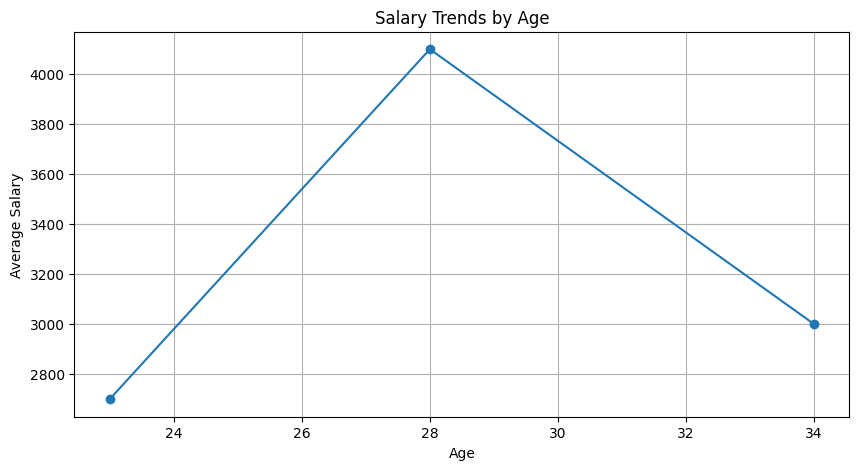

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


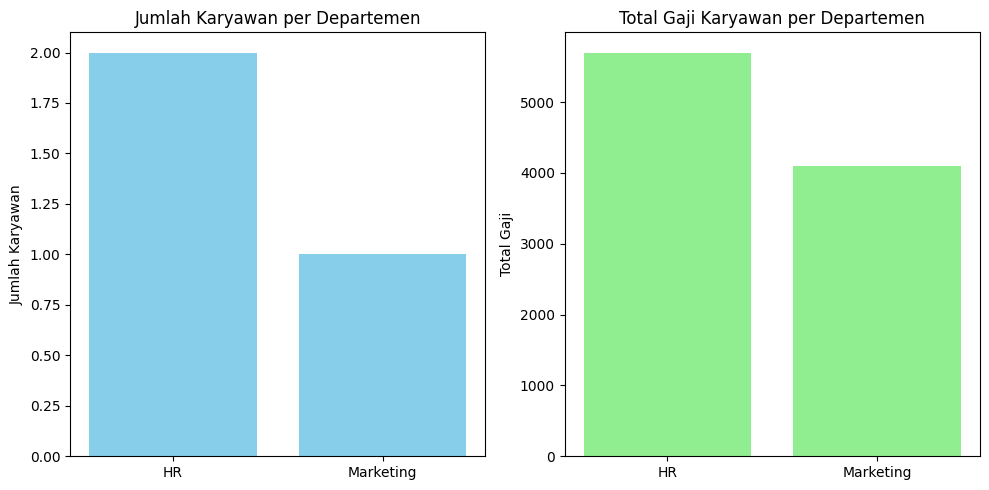

In [27]:
# SQL query untuk total gaji dan jumlah karyawan per departemen
import matplotlib.pyplot as plt
import pandas as pd

department_stats = spark.sql('''
SELECT d.DeptName, COUNT(e.Name) AS NumEmployees, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY d.DeptName
''').toPandas()

# Visualisasi perbandingan antar departemen
plt.figure(figsize=(10, 5))

# Bar chart untuk jumlah karyawan
plt.subplot(1, 2, 1)
plt.bar(department_stats['DeptName'], department_stats['NumEmployees'], color='skyblue')
plt.title('Jumlah Karyawan per Departemen')
plt.ylabel('Jumlah Karyawan')

# Bar chart untuk total gaji
plt.subplot(1, 2, 2)
plt.bar(department_stats['DeptName'], department_stats['TotalSalary'], color='lightgreen')
plt.title('Total Gaji Karyawan per Departemen')
plt.ylabel('Total Gaji')

plt.tight_layout()
plt.show()


In [23]:
# SQL query untuk karyawan dengan gaji di atas rata-rata dalam kelompok usia
spark.sql('''
SELECT Name, Age, Salary
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').show()

+----+---+------+
|Name|Age|Salary|
+----+---+------+
|Anna| 28|  4100|
+----+---+------+



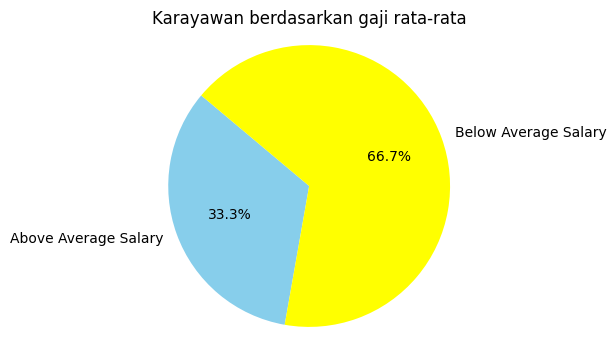

In [31]:
# Query SQL untuk mendapatkan jumlah karyawan di atas rata-rata
above_average = spark.sql('''
SELECT COUNT(*) AS Count
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').collect()[0]['Count']

# Query SQL untuk mendapatkan jumlah karyawaman dibawah rata-rata
below_average = spark.sql('''
SELECT COUNT(*) AS Count
FROM employees
WHERE Salary < (SELECT AVG(Salary) FROM employees)
''').collect()[0]['Count']

# Data pie chart
labels = ['Above Average Salary', 'Below Average Salary']
sizes = [above_average, below_average]
colors = ['skyblue', 'yellow']
explode = (0, 0)

# Membuat pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Karayawan berdasarkan gaji rata-rata')
plt.axis('equal') 
plt.show()


In [69]:
from pyspark.sql import SparkSession

# Membuat Spark Session
spark = SparkSession.builder.appName("CustomerShopping").getOrCreate()

# Memuat file CSV ke dalam DataFrame Spark
file_customer = "C:/Users/ASUS.LAPTOP-VOUEQVVB/Downloads/customer_shopping_data.csv/data_customer.csv"
df_spark = spark.read.option("header", True).csv(file_customer, inferSchema=True)

# Daftarkan DataFrame sebagai temp view agar bisa menggunakan SQL
df_spark.createOrReplaceTempView("transactions")

# Menghitung Total Pembelian (SUM) untuk setiap pelanggan
print("Total Pembelian (SUM) untuk setiap pelanggan")
spark.sql('''
SELECT customer_id, 
SUM(price * quantity) AS total_spent
FROM transactions
GROUP BY customer_id
''').show()

# Menghitung rata-rata Pembelian (AVG) berdasarkan kategori barang
print ("Rata-rata Pembelian (AVG) berdasarkan kategori barang")
spark.sql('''
SELECT category, 
AVG(price) AS average_price
FROM transactions
GROUP BY category;
''').show()

# Menghitung total penjualan berdasarkan gender
df_spark.createOrReplaceTempView("sales")
df_spark.createOrReplaceTempView("customers")

print("Total penjualan berdasarkan gender")
spark.sql('''
    SELECT customers.gender, COUNT(*) AS total_penjualan 
    FROM sales 
    JOIN customers ON sales.customer_id = customers.customer_id 
    GROUP BY customers.gender
''').show()

# Menghitung Total Penjualan per Pusat Perbelanjaan berdasarkan Gender
print("Total Penjualan per Pusat Perbelanjaan berdasarkan Gender")
spark.sql('''
SELECT sales.shopping_mall, customers.gender, COUNT(*) AS total_penjualan
FROM sales
JOIN customers ON sales.customer_id = customers.customer_id
GROUP BY sales.shopping_mall, customers.gender;
''').show()

Total Pembelian (SUM) untuk setiap pelanggan
+-----------+------------------+
|customer_id|       total_spent|
+-----------+------------------+
|    C236859|           26250.0|
|    C513561|             47.07|
|    C294024|            7502.0|
|    C248884|            162.64|
|    C113739|           4801.28|
|    C216369|              5.23|
|    C182606|          15004.25|
|    C323469|            1016.5|
|    C299567|             47.07|
|    C128277|            1016.5|
|    C761041|            143.36|
|    C239313|            1016.5|
|    C128876|            600.17|
|    C475080|           1200.32|
|    C632239|           1200.32|
|    C280151|2700.7200000000003|
|    C274780|             242.4|
|    C967744|           5401.53|
|    C286502|            1050.0|
|    C319808|            600.17|
+-----------+------------------+
only showing top 20 rows

Rata-rata Pembelian (AVG) berdasarkan kategori barang
+---------------+------------------+
|       category|     average_price|
+--------

C:\Users\ASUS.LAPTOP-VOUEQVVB\AppData\Local\Temp\ipykernel_21644\500833029.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x="category", y="total_sales", palette="viridis")
C:\Users\ASUS.LAPTOP-VOUEQVVB\AppData\Local\Temp\ipykernel_21644\500833029.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Subcategory")  # Menambahkan legenda


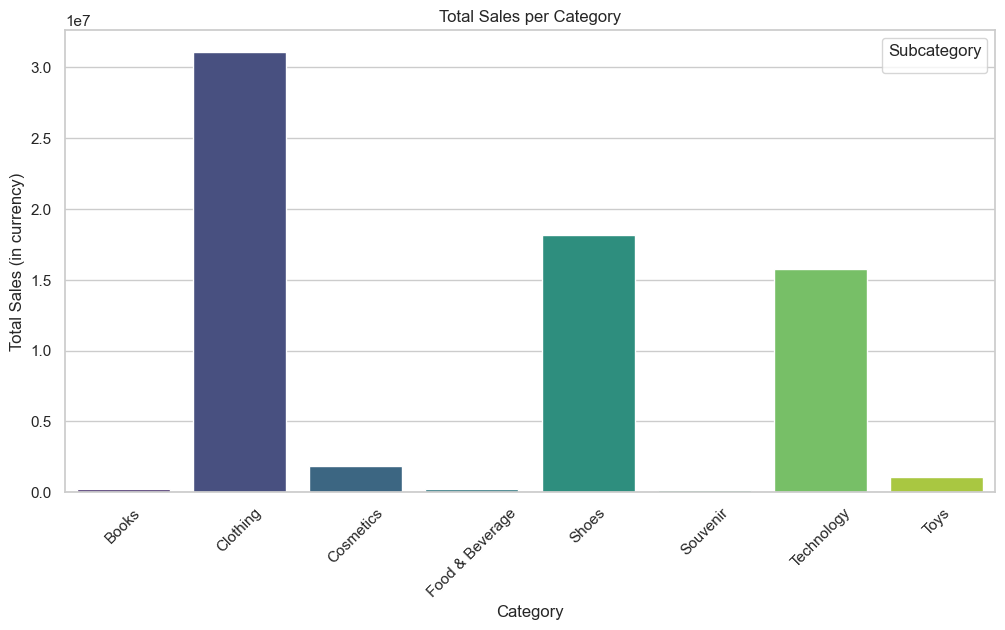

C:\Users\ASUS.LAPTOP-VOUEQVVB\AppData\Local\Temp\ipykernel_21644\500833029.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x="category", y="avg_price", palette="magma")


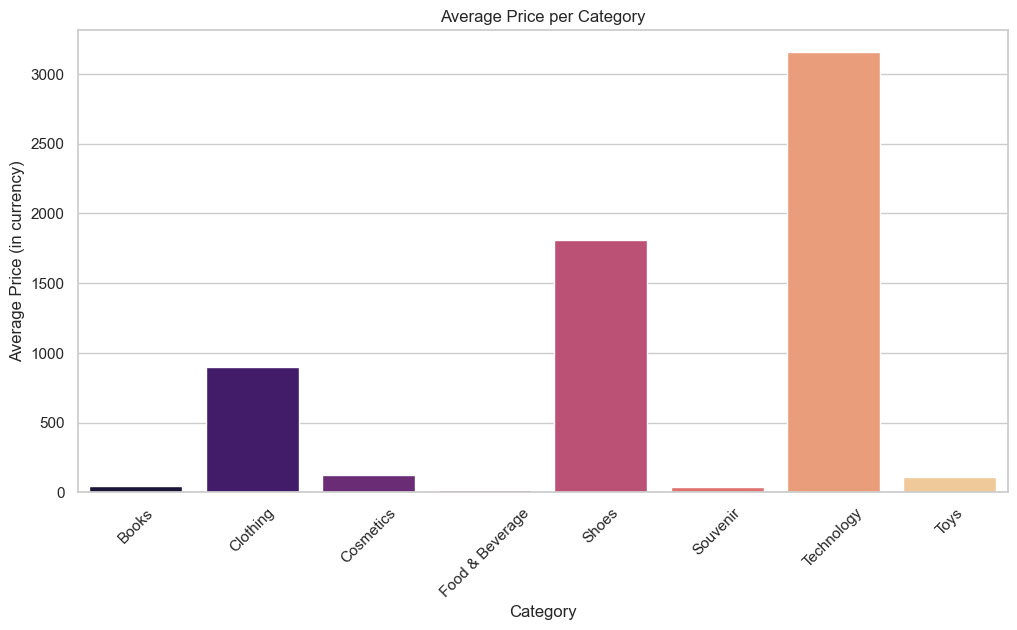

C:\Users\ASUS.LAPTOP-VOUEQVVB\AppData\Local\Temp\ipykernel_21644\500833029.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary, x="category", y="transaction_count", palette="coolwarm")


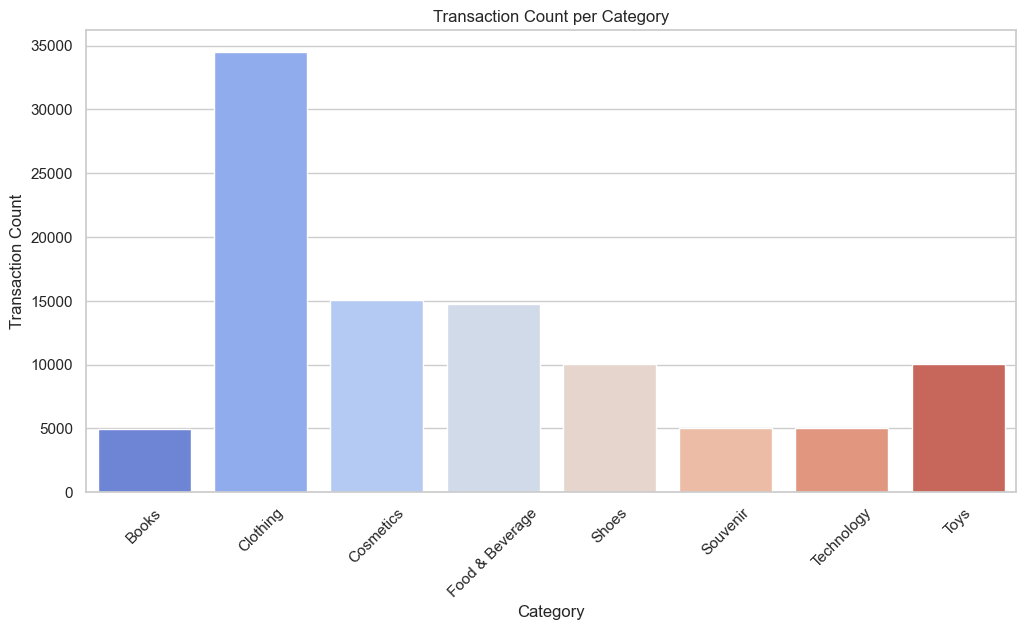

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:/Users/ASUS.LAPTOP-VOUEQVVB/Downloads/customer_shopping_data.csv/data_customer.csv"
data = pd.read_csv(file_path)

# Menghitung total penjualan dan rata-rata harga per kategori barang
category_summary = data.groupby("category").agg(
    total_sales=("price", "sum"),
    avg_price=("price", "mean"),
    transaction_count=("invoice_no", "count")
).reset_index()

# Set up visual style
sns.set(style="whitegrid")

# Visualisasi Total Penjualan per Kategori
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x="category", y="total_sales", palette="viridis")
plt.title("Total Sales per Category")
plt.ylabel("Total Sales (in currency)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.legend(title="Subcategory")  # Menambahkan legenda
plt.show()

# Visualisasi Harga Rata-rata per Kategori
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x="category", y="avg_price", palette="magma")
plt.title("Average Price per Category")
plt.ylabel("Average Price (in currency)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# Visualisasi Jumlah Transaksi per Kategori
plt.figure(figsize=(12, 6))
sns.barplot(data=category_summary, x="category", y="transaction_count", palette="coolwarm")
plt.title("Transaction Count per Category")
plt.ylabel("Transaction Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


In [55]:
pip install sea